In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.formula.api as smf

# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import iplot, init_notebook_mode, plot
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df = pd.read_csv('data_files/Winkeldaten_analyse_punkt_01.csv')

In [6]:
df.head()

C     S     T     A  Alpha  Theta  beta    dC     dS    zz    dCS
0  27.1  -8.2 -29.7  28.0  -15.7  135.8  40.6  33.0  20.00  11.4  38.59
1  25.5 -17.3 -29.7  29.7  -33.1  134.1  41.7   6.0   8.00  24.4  10.00
2  22.0 -17.3 -29.7  27.0  -37.6  136.8  40.0   1.0   8.59  29.3   8.65
3  21.5 -16.5 -29.7  26.2  -36.9  137.7  39.4   0.0   7.00  28.5   7.00
4  22.0 -16.0 -29.7  25.6  -36.8  138.4  39.0   0.0   7.00  29.2   7.00

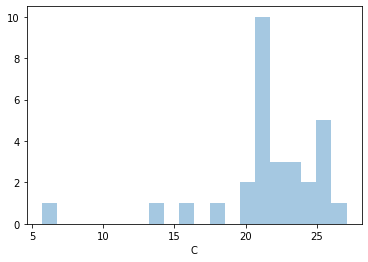

In [7]:
sns.distplot(df['C'], kde=False, bins=20)
plt.show()

In [8]:
df['C'].iplot(kind='hist', xTitle='degrees',
yTitle='count', title='C Distribution')
plt.show()

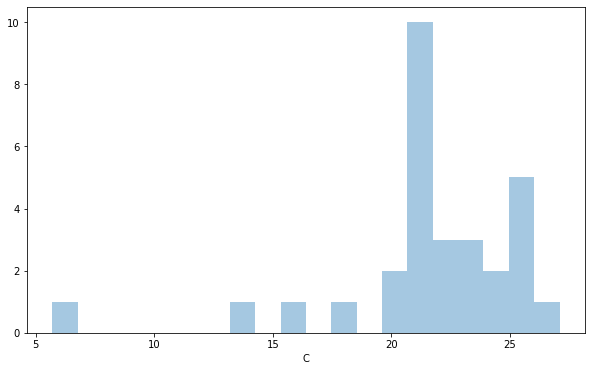

In [9]:
plt.figure(figsize=[10,6])
sns.distplot(df['C'], kde=False, bins=20)
plt.show()

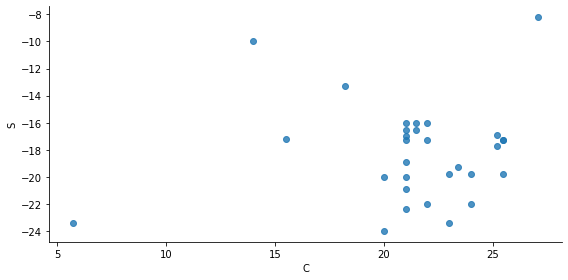

In [10]:
sns.lmplot('C', 'S', data=df, fit_reg= False, aspect=2, size =4)
plt.show()

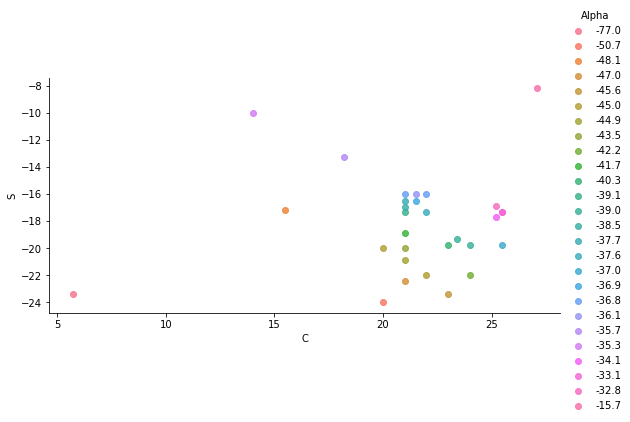

In [11]:
sns.lmplot('C', 'S', data=df, fit_reg= False, aspect=2, size =4, hue='Alpha')
plt.show()

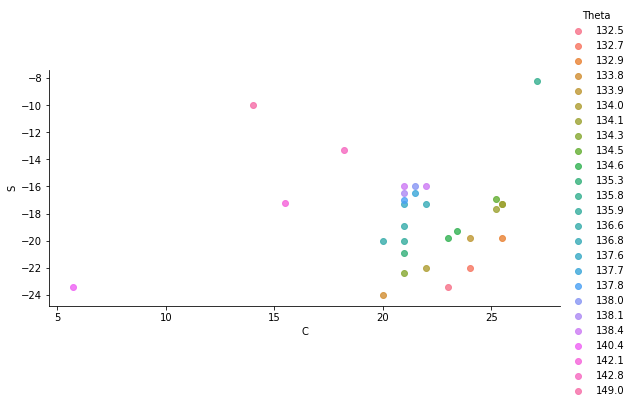

In [12]:
sns.lmplot('C', 'S', data=df, fit_reg= False, aspect=2, size =4, hue='Theta')
plt.show()

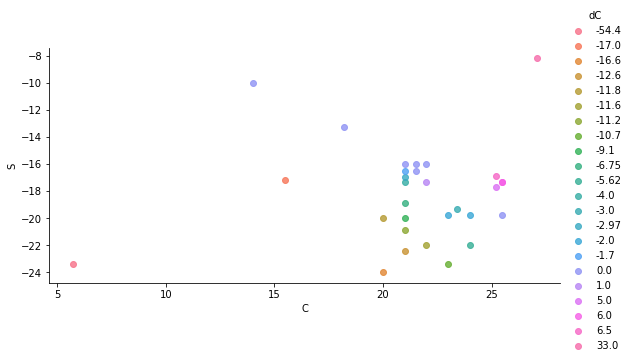

In [13]:
sns.lmplot('C', 'S', data=df, fit_reg= False, aspect=2, size =4, hue='dC')
plt.show()

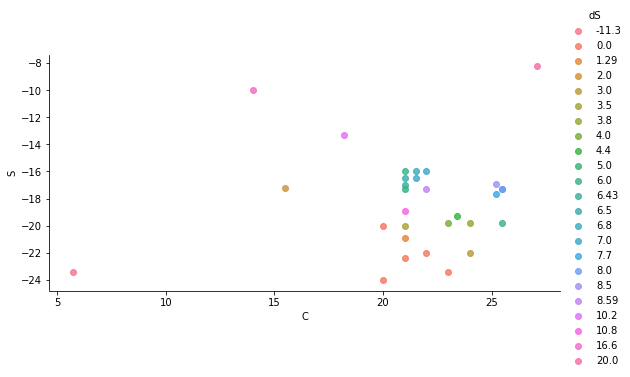

In [14]:
sns.lmplot('C', 'S', data=df, fit_reg= False, aspect=2, size =4, hue='dS')
plt.show()

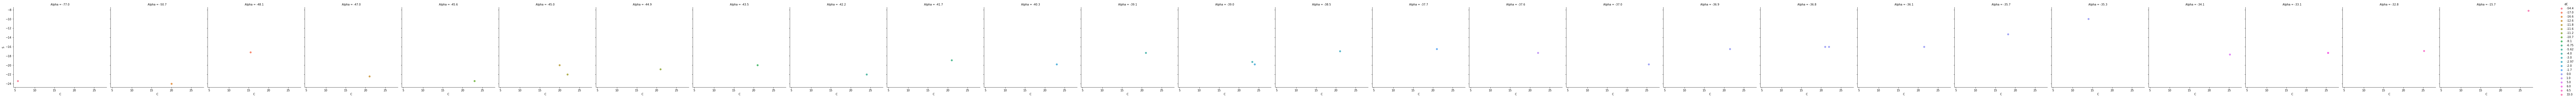

In [15]:
sns.lmplot('C', 'S', data=df, fit_reg= False, aspect=1, size =5, hue='dC', col='Alpha')
plt.show()

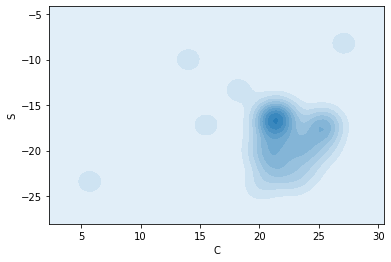

In [16]:
sns.kdeplot(df['C'], df['S'], shade=True)
plt.show()

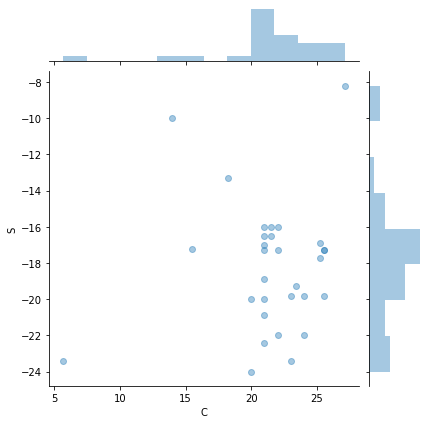

In [17]:
sns.jointplot('C', 'S', data=df, alpha=0.4)
plt.show()

In [18]:
df.iplot(
x='dC',
y='dS',
# Specify the category
categories='S',
xTitle='dC',
yTitle='dS',
title='Abweichungen dC und dS in Abh채ngigkeit von S')
plt.show()

In [19]:
df.iplot(
x='dC',
y='dS',
# Specify the category
categories='C',
xTitle='dC',
yTitle='dS',
title='Abweichungen dC und dS in Abh채ngigkeit von C')
plt.show()

In [20]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS']],
# width=2000, height=2000,
# diag='histogram',
# index='dC')
# plot(figure, filename='plotly_scatterplot_dC.html')
# figure.show()

In [21]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS']],
# width=2000, height=2000,
# diag='histogram',
# index='dS')
# plot(figure, filename='plotly_scatterplot_dS.html')
# figure.show()

In [22]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS']],
# width=2000, height=2000,
# diag='histogram',
# index='A')
# plot(figure, filename='plotly_scatterplot_A.html')
# figure.show()

In [23]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS']],
# width=2000, height=2000,
# diag='histogram',
# index='Alpha')
# plot(figure, filename='plotly_scatterplot_Alpha.html')
# figure.show()

In [24]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS']],
# width=2000, height=2000,
# diag='histogram',
# index='beta')
# plot(figure, filename='plotly_scatterplot_beta.html')
# figure.show()

In [25]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS']],
# # df[['C','S','A','Alpha','Theta','dC']],
# width=2000, height=2000,
# diag='histogram',
# index='C')
# plot(figure, filename='plotly_scatterplot_C.html')
# figure.show()

In [26]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS']],
# width=2000, height=2000,
# diag='histogram',
# index='S')
# plot(figure, filename='plotly_scatterplot_S.html')
# figure.show()

In [27]:
# figure = ff.create_scatterplotmatrix(
# df[['C','S','T','A','Alpha','Theta','beta','dC','dS']],
# # df[['C','S','A','Alpha','Theta','dC']],
# width=2000, height=2000,
# diag='histogram',
# index='T')
# plot(figure, filename='plotly_scatterplot_T.html')
# figure.show()

In [28]:
# g = sns.PairGrid(df, diag_sharey=False)
# g.map_lower(sns.kdeplot, )
# g.map_upper(plt.scatter)
# g.map_diag(sns.kdeplot)
# plt.show()
# g.savefig("pair_grid_C_S")

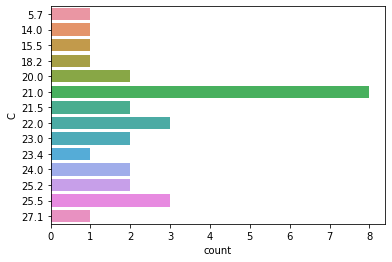

In [29]:
sns.countplot(y = 'C', data=df)
plt.show()

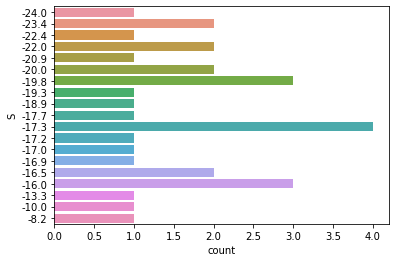

In [30]:
sns.countplot(y = 'S', data=df)
plt.show()

In [31]:
# fig = go.Figure(go.Box(
#         x=df.C,
#         y=df.S))
# py.iplot(fig, filename='sns_boxplot_C_S.html')
# fig.show()

In [32]:
corrs = df.corr()
figure = ff.create_annotated_heatmap(
z=corrs.values,
x=list(corrs.columns),
y=list(corrs.index),
annotation_text=corrs.round(2).values,
showscale=True)
figure['layout']['yaxis']['autorange'] = "reversed"
figure.savefig("plotly_heatmap_C_S")
figure.show()

AttributeError: 'Figure' object has no attribute 'savefig'

In [ ]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('C-S Attributes Correlation Heatmap', fontsize=14)
f.savefig("heatmap_C_S")

In [ ]:
model = smf.ols(formula='dS ~ S', data=df)
results = model.fit()
print(results.summary())
print(results.params)
print(results.conf_int())



In [ ]:
model = smf.ols(formula='dC ~ C', data=df)
results = model.fit()
print(results.summary())
print(results.params)
print(results.conf_int())


In [ ]:
model = smf.ols(formula='dC ~ C + S', data=df)
results = model.fit()
print(results.summary())
print(results.params)
print(results.conf_int())


In [ ]:
model = smf.ols(formula='dC ~ Alpha', data=df)
results = model.fit()
print(results.summary())
print(results.params)
print(results.conf_int())
